In [14]:
import lightkurve as lk

lcf = lk.search_lightcurvefile('K2-198').download()

/Users/ch/K2/repos/lightkurve/lightkurve/search.py:142: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


In [15]:
lcf.hdu[0].header['KEPMAG']

11.022

In [16]:
lcf.ra, lcf.dec

(198.84381, -6.464886)

In [17]:
import threemultis

/Users/ch/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [18]:
import pickle
samples = pickle.load(open('../../threemultis/results/K2-198_samples.p', 'rb'))

lc= pickle.load(open('../../threemultis/results/K2-198.p', 'rb'))

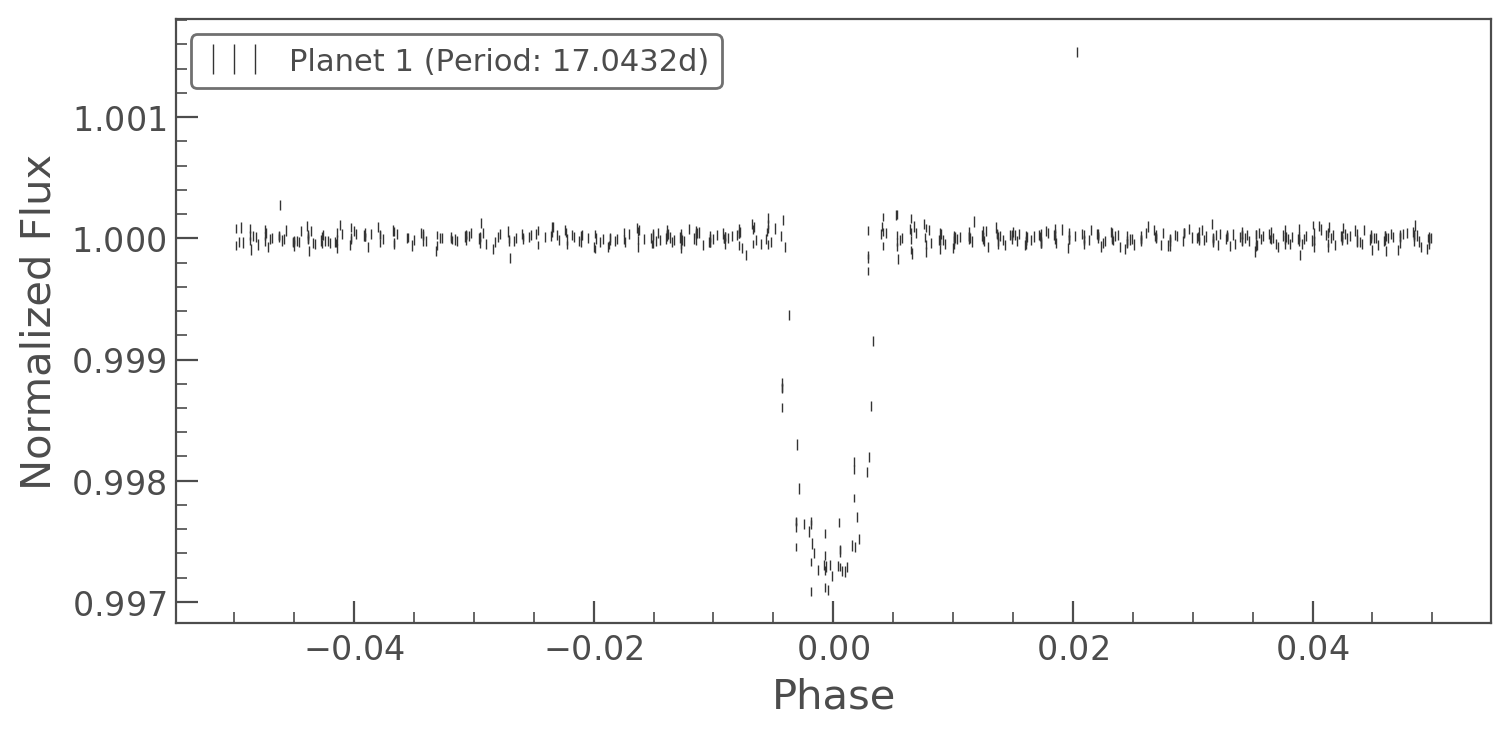

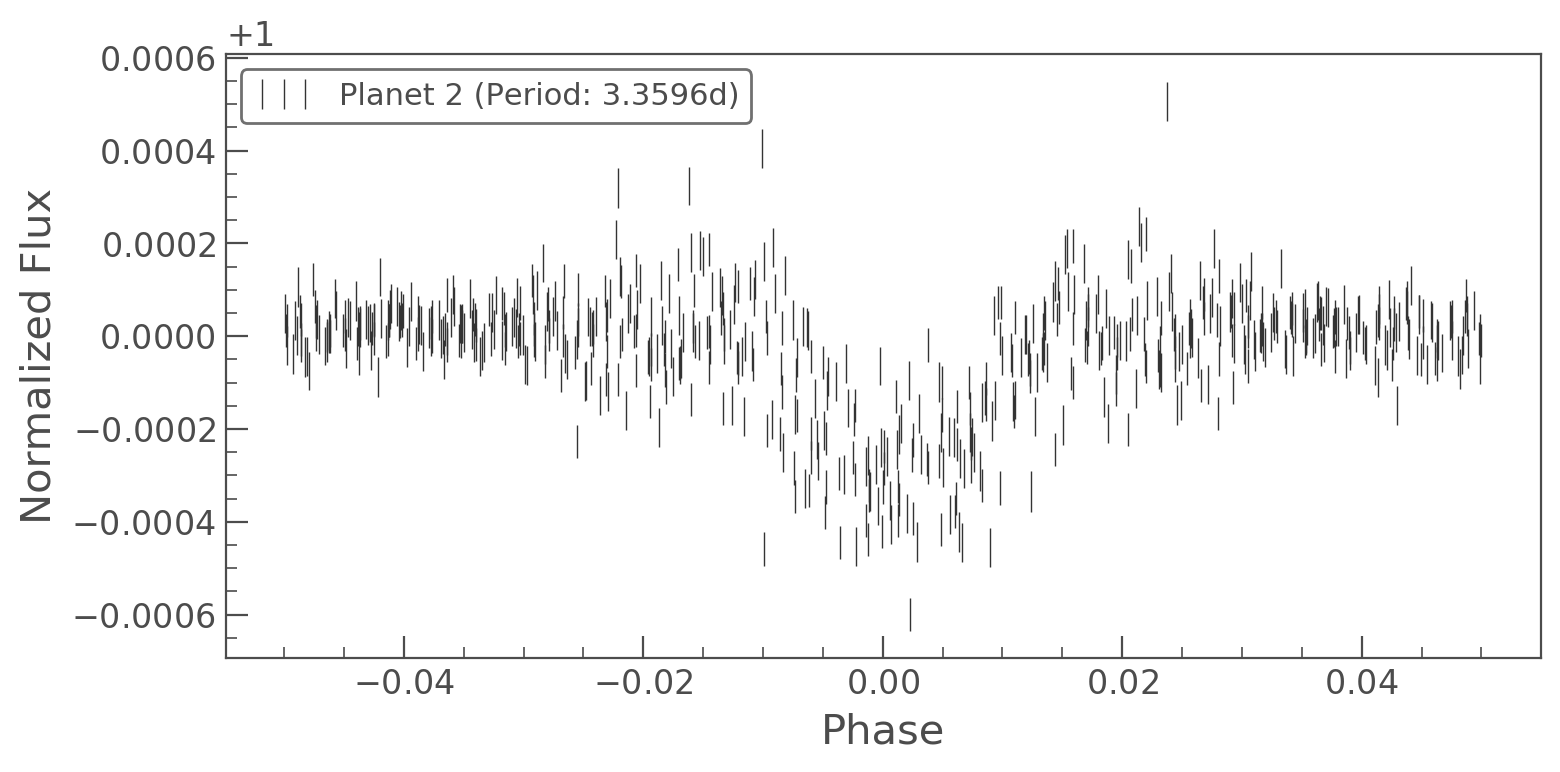

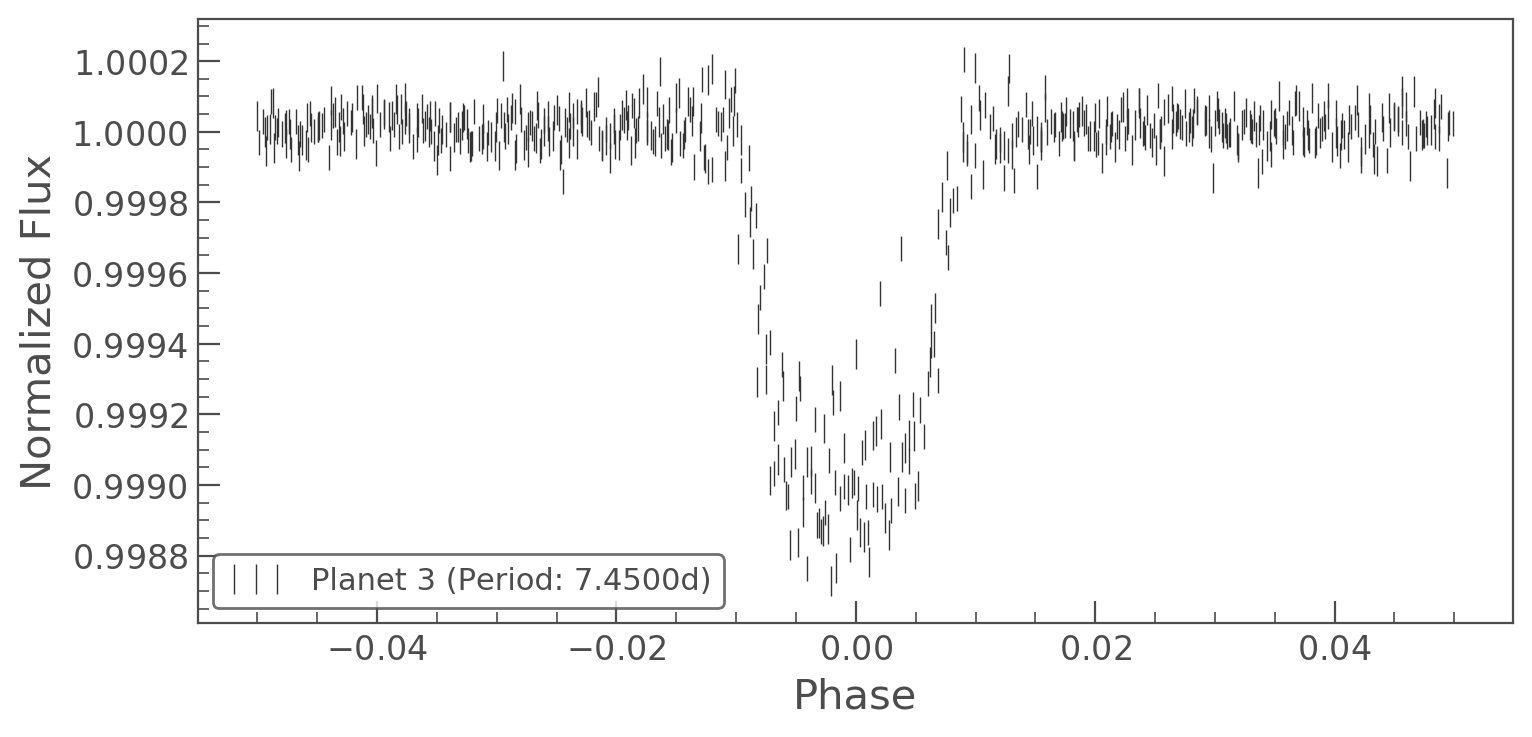

In [26]:
import pandas as pd
import numpy as np
params = threemultis.utils.get_params('K2-198')
letters= ['b', 'c', 'd']
for planet, df in params.iterrows():
    otherplanets = list(set(list(np.arange(len(params)))) - set([planet]))
    mask = np.ones(len(lc.time), bool)
    for op in otherplanets:
        p1 = params.loc[op, 'Period']
        t01 = params.loc[op, 'T0']
        d1 = params.loc[op, 'Duration']
        x_fold = (lc.time - t01 + 0.5*p1) % p1 - 0.5*p1
        mask &= (np.abs(x_fold) > d1/2)

    p = df['Period']
    t0 = df['T0']
    d = df['Duration']
    x_fold = (lc.time - t0 + 0.5*p) % p - 0.5*p
    f = lc[mask].fold(p, t0).bin(1)
    k = np.abs(f.phase) < 0.05
    f = f[k]
    f.errorbar(label='Planet {} (Period: {:2.4f}d)'.format(planet + 1, p))
    r = pd.DataFrame(columns=['phase', 'flux', 'flux_err'])
    r['phase'] = f.phase * p
    r['flux'] = f.flux
    r['flux_err'] = f.flux_err
    r.to_csv('{0}/K2-198{0}.csv'.format(letters[planet]), index=None, header=None)

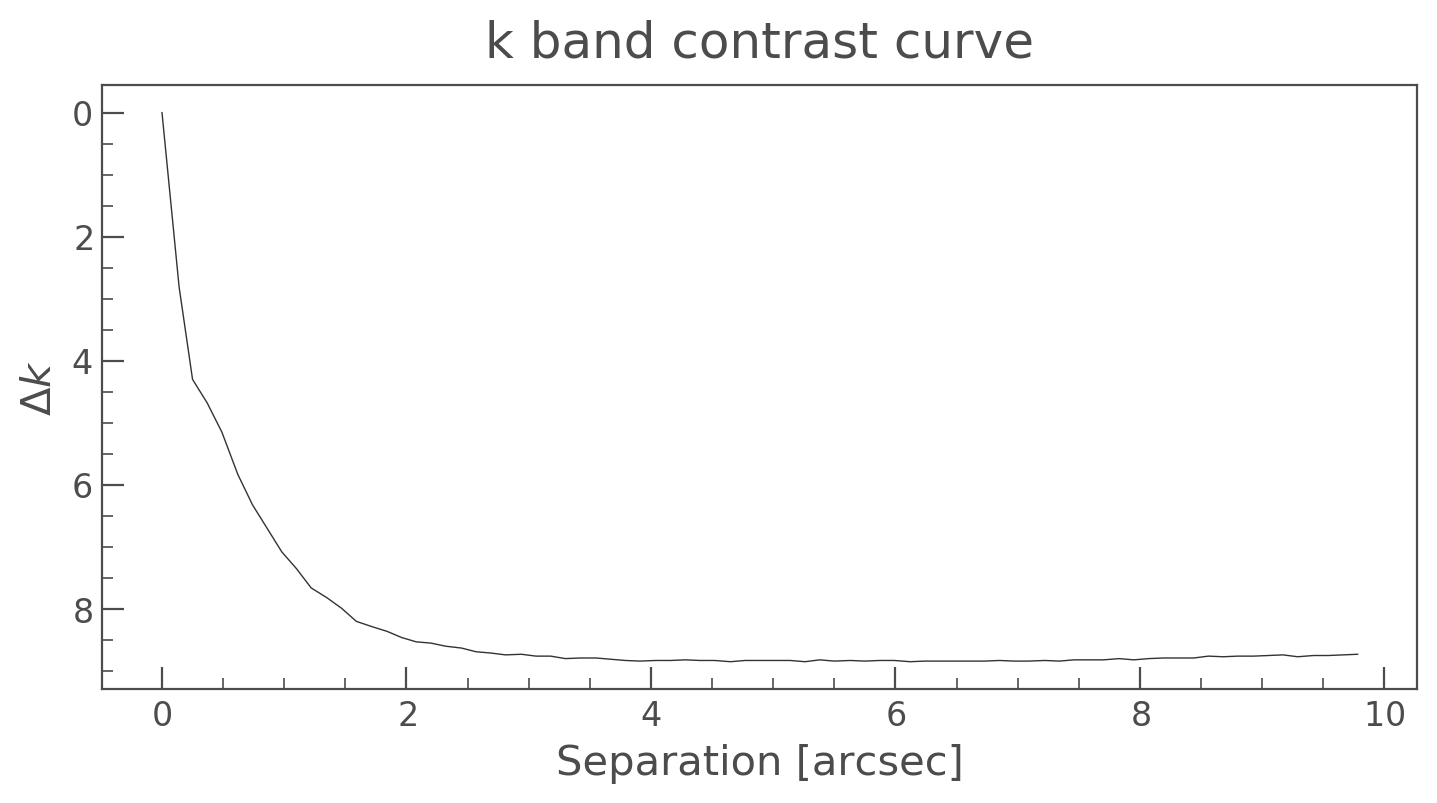

In [30]:
from vespa.stars.contrastcurve import ContrastCurveFromFile
cc = ContrastCurveFromFile('b/contrast-curve.txt', 'k')
cc.plot()

In [35]:
np.exp(samples.logP__2.median())

7.450020301574315

In [36]:
samples.r_pl__2.median()

0.022859140501612675

In [47]:
X2 = 25
def newprob(P1):
    return (X2*P1)/((X2*P1) + (1 - P1))

In [57]:
1 - newprob(1 - 0.000425)

1.700693883099902e-05

In [58]:
lc.targetid

212768333